In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import tensorflow as tf
from  tensorflow import keras
from tensorflow.keras import layers

In [3]:
data = keras.datasets.imdb

In [4]:
(x_train,y_train),(x_test,y_test)=data.load_data(num_words=10000)

In [5]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

文本训练成秘诀向量

In [6]:
[len(x) for x in x_train]

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177,
 129,
 140,
 256,
 888,
 93,
 142,
 220,
 193,
 171,
 221,
 174,
 647,
 233,
 162,
 597,
 234,
 51,
 336,
 139,
 231,
 704,
 142,
 861,
 132,
 122,
 570,
 55,
 214,
 103,
 186,
 113,
 169,
 469,
 138,
 302,
 766,
 351,
 146,
 59,
 206,
 107,
 152,
 186,
 431,
 147,
 684,
 383,
 324,
 252,
 263,
 787,
 211,
 314,
 118,
 390,
 132,
 710,
 306,
 167,
 115,
 95,
 158,
 156,
 82,
 502,
 314,
 190,
 174,
 60,
 145,
 214,
 659,
 408,
 515,
 461,
 202,
 238,
 170,
 107,
 171,
 158,
 145,
 790,
 258,
 287,
 67,
 123,
 975,
 775,
 236,
 195,
 274,
 214,
 91,
 1038,
 815,
 183,
 206,
 50,
 118,
 147,
 141,
 60,
 56,
 439,
 439,
 213,
 144,
 533,
 303,
 203,
 563,
 129,
 153,
 55,
 92,
 174,
 187,
 183,
 165,
 78,
 198,
 156,
 223,
 127,
 61,
 362,
 84,
 57,
 176,
 159,
 57,
 159,
 165,
 213,
 194,
 149,
 130,
 203,
 19,
 98,
 466,
 525,
 130,
 322,
 153,
 408,
 215,
 472,
 143,
 1

In [7]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train,300)
x_test = keras.preprocessing.sequence.pad_sequences(x_test,300)

In [8]:
x_train.shape

(25000, 300)

In [9]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [10]:
 text ='i am a student'

In [11]:
text.split().index('i')

0

In [65]:
model = keras.models.Sequential()

In [66]:
model.add(layers.Embedding(10000,50,input_length = 300))

In [67]:
model.add(layers.GlobalAveragePooling1D())

In [68]:
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 50)           500000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1632      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 501,665
Trainable params: 501,665
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
             loss = tf.keras.losses.binary_crossentropy,
             metrics=['acc'])

In [71]:
history = model.fit(x_train,y_train,epochs=10,batch_size=256,
         validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 13s 513us/sample - loss: 0.6803 - acc: 0.6266 - val_loss: 0.6441 - val_acc: 0.7489
Epoch 2/10
25000/25000 [==============================] - 11s 446us/sample - loss: 0.5430 - acc: 0.7989 - val_loss: 0.4433 - val_acc: 0.8326
Epoch 3/10
25000/25000 [==============================] - 11s 451us/sample - loss: 0.3731 - acc: 0.8594 - val_loss: 0.3387 - val_acc: 0.8686
Epoch 4/10
25000/25000 [==============================] - 11s 425us/sample - loss: 0.2970 - acc: 0.8898 - val_loss: 0.3028 - val_acc: 0.8789
Epoch 5/10
25000/25000 [==============================] - 10s 404us/sample - loss: 0.2520 - acc: 0.9051 - val_loss: 0.2891 - val_acc: 0.8823
Epoch 6/10
25000/25000 [==============================] - 10s 405us/sample - loss: 0.2240 - acc: 0.9174 - val_loss: 0.2817 - val_acc: 0.8847
Epoch 7/10
25000/25000 [==============================] - 10s 404us/sample - loss: 0.2036 - acc: 0.9277 

In [72]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [73]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

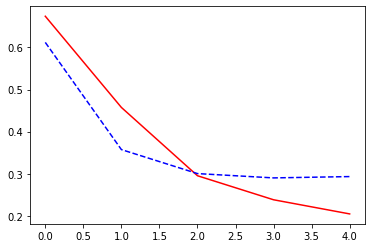

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.epoch,history.history['loss'],'r',label='loss')
plt.plot(history.epoch,history.history['val_loss'],'b--',label='val_loss')


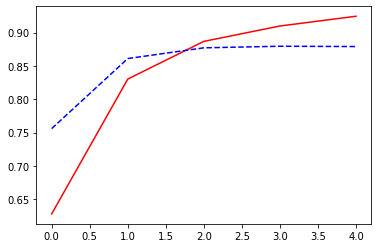

In [62]:
plt.plot(history.epoch,history.history['acc'],'r',label='acc')
plt.plot(history.epoch,history.history['val_acc'],'b--',label='val_acc')

In [ ]:
#解决过拟合问题 